### Patrick Horlaville (260931235) - Problem Set 5 - PHYS 641 : Observational Techniques in Modern Astrophysics

Prof: Jon Sievers. TA: Anan Lu

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Problem 1

a)

We would like to report the NS/EW 2D coordinates of our VLA (A and D) arrays, which are given in 3D with (x, y, z)  in light nanoseconds. To perform that conversion, we use the local zenith (VLA latitude = 34.1 degrees)

Notice that in our spherical coordinate system, $\theta$ goes from 0 to 90 degrees from the North Pole to the Equator. However, the latitude of a coordinate on Earth goes from 90 to 0 from NP to Equator. So, latitude = 90 - $\theta$. So to retrieve our $\theta$ coordinate, we have to take $\theta$ = latitude - 90 (for the Northern Hemisphere, as the VLA is located in the Northern Hemisphere).

First, we load the data:

In [2]:
vla_a = np.loadtxt('txtfiles/vla_a_array.txt')
vla_d = np.loadtxt('txtfiles/vla_d_array.txt')

Our data has 4 columns:

In [3]:
vla_a

array([[   509.53,  -1338.54,   -745.23,    484.02],
       [  1667.27,  -4396.35,  -2452.41,   1589.8 ],
       [  3353.71,  -8816.08,  -4910.74,   3188.05],
       [  5470.5 , -14443.13,  -8061.25,   5222.88],
       [  7988.65, -21181.36, -11844.8 ,   7659.49],
       [ 10925.7 , -28961.66, -16194.06,  10473.  ],
       [ 14206.44, -37731.09, -21114.62,  13643.97],
       [ 17842.85, -47447.29, -26566.65,  17157.45],
       [ 21802.57, -58074.16, -32540.96,  21000.19],
       [   381.68,   1463.33,   -565.35,    484.02],
       [  1257.45,   4806.65,  -1855.04,   1589.92],
       [  2552.45,   9638.2 ,  -3698.88,   3188.13],
       [  4180.34,  15789.68,  -6060.6 ,   5222.93],
       [  6127.38,  23156.24,  -8890.33,   7659.65],
       [  8324.92,  31661.66, -12190.73,  10472.93],
       [ 10813.96,  41248.78, -15902.56,  13644.  ],
       [ 13620.16,  51870.75, -19982.12,  17157.37],
       [ 16204.22,  63678.31, -24269.82,  20999.45],
       [  -812.58,   -126.88,   1200.98,    43

But for now we only care about the first three: the (x, y, z) coordinates:

In [4]:
vla_a[:, :3]

array([[   509.53,  -1338.54,   -745.23],
       [  1667.27,  -4396.35,  -2452.41],
       [  3353.71,  -8816.08,  -4910.74],
       [  5470.5 , -14443.13,  -8061.25],
       [  7988.65, -21181.36, -11844.8 ],
       [ 10925.7 , -28961.66, -16194.06],
       [ 14206.44, -37731.09, -21114.62],
       [ 17842.85, -47447.29, -26566.65],
       [ 21802.57, -58074.16, -32540.96],
       [   381.68,   1463.33,   -565.35],
       [  1257.45,   4806.65,  -1855.04],
       [  2552.45,   9638.2 ,  -3698.88],
       [  4180.34,  15789.68,  -6060.6 ],
       [  6127.38,  23156.24,  -8890.33],
       [  8324.92,  31661.66, -12190.73],
       [ 10813.96,  41248.78, -15902.56],
       [ 13620.16,  51870.75, -19982.12],
       [ 16204.22,  63678.31, -24269.82],
       [  -812.58,   -126.88,   1200.98],
       [ -2673.19,   -416.88,   3943.1 ],
       [ -5538.93,   -865.16,   8187.02],
       [ -8769.76,  -1369.81,  12961.02],
       [-12857.81,  -2009.03,  19009.59],
       [-17583.09,  -2747.09,  259

We write our function to retrieve antenna positions. First, load the appropriate coordinates. Then, find the local zenith = (sin($\theta$), 0, cos($\theta$)) where $\theta$ is in radians. The East/West vector is (0, 1, 0) and the North-South vector is the cross product of the zenith with the East-West. Then, find positions with the multiplications of the positions and the EW/NS/zenith vectors

In [5]:
def ant_pos(data):
    
    pos = data[:, :3]*1e-9*3e8
    
    lat = (90 - 34.1)*np.pi/180
    
    zen = np.array([np.sin(lat), 0, np.cos(lat)])
    
    EW = np.array([0,1,0])
    NS = np.cross(zen, EW)
            
    xyz = pos@np.vstack([EW, NS, zen]).T
    
    return xyz

In [6]:
xyz_a = ant_pos(vla_a)
xyz_d = ant_pos(vla_d)

In [7]:
EW_a = xyz_a[:,0]
NS_a = xyz_a[:,1]

EW_d = xyz_d[:,0]
NS_d = xyz_d[:,1]

Vertical RMS for VLA_A =  19.873410538545027 m
Vertical RMS for VLA_D =  0.8127155170471829 m


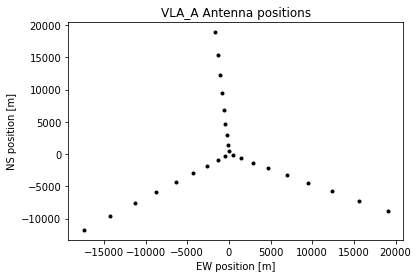

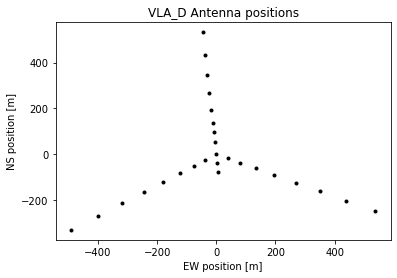

In [8]:
plt.figure(0)

plt.scatter(EW_a, NS_a, marker = '.', color = 'k')
plt.xlabel('EW position [m]')
plt.ylabel('NS position [m]')
plt.title('VLA_A Antenna positions')
print('Vertical RMS for VLA_A = ', np.sqrt(np.mean(xyz_a[:,2]**2)), 'm')

plt.figure(1)

plt.scatter(EW_d, NS_d, marker = '.', color = 'k')
plt.xlabel('EW position [m]')
plt.ylabel('NS position [m]')
plt.title('VLA_D Antenna positions')
print('Vertical RMS for VLA_D = ', np.sqrt(np.mean(xyz_d[:,2]**2)), 'm')

b)

We want to make a UV plot for a source directly overhead of both configurations. Take $f$ = 1.4GHz.
PLEASE note that the wavelengths values are normalized because in part c), I tried using the raw values (in m) and the inverse FFT took a long long time to run (didn't even finish after 30 minutes). So I'm using units of "10m" instead of m

In [134]:
def uv_lamb(data, dec_deg_arr, f = 1.4e9):
    
    xyz = ant_pos(data)
    pos = data[:, :3]*1e-9*3e8
    
    
    nant = xyz[:,0].shape[0]
    nvis = nant*(nant - 1)//2
    uv = np.zeros([nvis, 3])
    icur = 0
    
    for i in range(nant):
        for j in range(i + 1, nant):
            
            uv[icur,:] = pos[i,:] - pos[j,:]
            
            icur = icur + 1
            
    uv = np.vstack([uv, - uv])/3e8*f / 10 # normalized here

    dec_arr = (90 - dec_deg_arr)*np.pi/180
    
    for d in dec_arr: 
        
        zenith = np.array([np.sin(d), 0, np.cos(d)])
        EW = np.array([0, 1, 0])
        NS = np.cross(zenith, EW)
        proj_mat = np.vstack([EW, NS])
        uv_snap = uv@proj_mat.T

    return uv_snap

In [135]:
uv_snap_a = uv_lamb(vla_a, np.array([31.5]))
uv_snap_d = uv_lamb(vla_d, np.array([31.5]))

Text(0, 0.5, '10$\\lambda$')

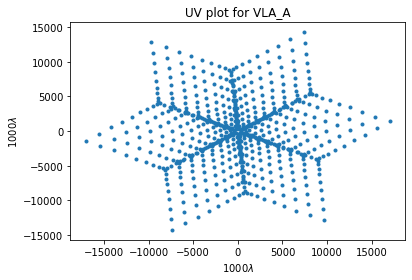

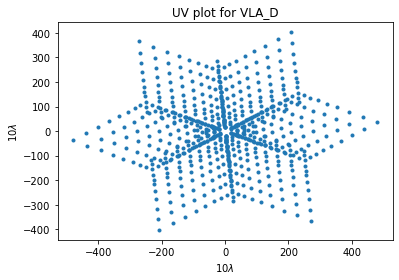

In [136]:
plt.figure(0)

plt.plot(uv_snap_a[:,0], uv_snap_a[:,1], '.')
plt.title('UV plot for VLA_A')
plt.xlabel(r'1000$\lambda$')
plt.ylabel(r'1000$\lambda$')

plt.figure(1)

plt.plot(uv_snap_d[:,0], uv_snap_d[:,1], '.')
plt.title('UV plot for VLA_D')
plt.xlabel(r'10$\lambda$')
plt.ylabel(r'10$\lambda$')

c)

We would like now to plot the dirty beam for the UV coverage as shown in b). 

In [26]:
def beam_lamb(data, du, dec_deg_arr, f = 1.4e9):
    
    xyz = ant_pos(data)
    pos = data[:, :3]*1e-9*3e8
    
    
    nant = xyz[:,0].shape[0]
    nvis = nant*(nant - 1)//2
    uv = np.zeros([nvis, 3])
    icur = 0
    
    for i in range(nant):
        for j in range(i + 1, nant):
            
            uv[icur,:] = pos[i,:] - pos[j,:]
            
            icur = icur + 1
            
    uv = np.vstack([uv, - uv])/3e8*f /10 # normalized
    uv_snap = uv_lamb(data, dec_deg_arr)
        
    pad = 4
    sz = int(np.max(np.abs(uv))/du)
    uv_mat = np.zeros([pad*2*sz, pad*2*sz])
    uv_int = np.asarray(uv_snap/du, dtype = 'int')
    
    for i in range(uv_snap.shape[0]):
        uv_mat[uv_int[i, 0], uv_int[i, 1]] = uv_mat[uv_int[i, 0], uv_int[i, 1]] + 1
        
    res = np.abs(np.fft.ifft2(uv_mat))
    
    return res

In [27]:
du_a = 40
du_d = 2

In [28]:
beam_a = beam_lamb(vla_a, du_a, np.array([31.5]))
beam_d = beam_lamb(vla_d, du_d, np.array([31.5]))

Text(0.5, 1.0, 'Dirty beam for VLA_D')

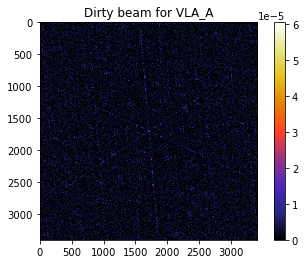

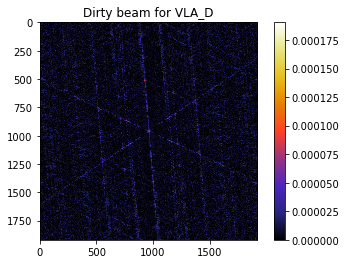

In [34]:
plt.figure(0)

plt.imshow(np.fft.fftshift(beam_a), cmap = 'CMRmap', interpolation = 'nearest')
plt.colorbar()
plt.title('Dirty beam for VLA_A')

plt.figure(1)

plt.imshow(np.fft.fftshift(beam_d), cmap = 'CMRmap', interpolation = 'nearest')
plt.colorbar()
plt.title('Dirty beam for VLA_D')

d)

Now we want to repeat the UV plots but with 8 hours of observing time (symmetric around the transit). We do it for three types of sources: one directly overhead, one on the Equator, and one at the North celestial pole.

In [ ]:
titles = ['A', 'D']
color = ['red', 'blue']
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5), constrained_layout=True)
du = [40, 2]

In [48]:
def uv_lamb_time(data, source_loc, freq = 1.4e9, norm = 10):
    
    pos = data[:, :3]*1e-9*3e8
    xyz = ant_pos(data)

    nant = xyz[:,0].shape[0]
    nvis = nant * (nant - 1) // 2
    uv = np.zeros([nvis,3])
    icur = 0
    
    for i in range(nant):
        for j in range(i+1,nant):
            uv[icur,:] = pos[i,:] - pos[j,:]
            icur = icur+1
            
    uv = np.vstack([uv, - uv]) / 3e8 * freq / norm

    t_range = np.linspace(-4, 4, 64)
    theta_range = t_range*2*np.pi/24
        
    for theta in theta_range:
        
        rot_mat = np.zeros([3,3])
        rot_mat[0,0] = np.cos(theta)
        rot_mat[1,1] = np.cos(theta)
        rot_mat[2,2] = 1.0
        rot_mat[0,1] = np.sin(theta)
        rot_mat[1,0] = -np.sin(theta)
        uv_rot = uv@rot_mat
            
        EW = np.array([0, 1, 0])
        NS = np.cross(source_loc, EW)
        proj_mat = np.vstack([EW, NS])
        uv_snap = uv_rot@proj_mat.T

    return uv_snap[:,0], uv_snap[:,1]

Overhead source:

In [49]:
overhead = np.array([np.sin((90-34.1)*np.pi/180), 0, np.cos((90-34.1)*np.pi/180)])

uv_a_head = uv_lamb_time(vla_a, overhead, freq = 1.4e9, norm = 1000)
uv_d_head = uv_lamb_time(vla_d, overhead, freq = 1.4e9, norm = 1000)

Text(0.5, 1.0, 'VLA_D Overhead')

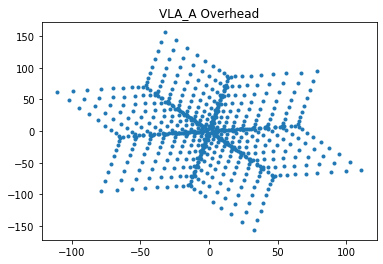

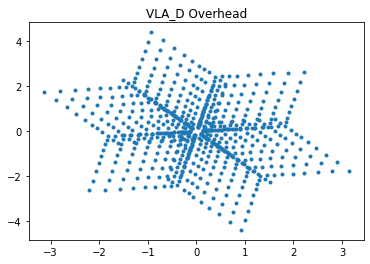

In [50]:
plt.figure(0)

plt.plot(uv_a_head[0], uv_a_head[1], '.')
plt.title('VLA_A Overhead')

plt.figure(1)

plt.plot(uv_d_head[0], uv_d_head[1], '.')
plt.title('VLA_D Overhead')

Equator source:

In [42]:
equator = np.array([np.sin(np.pi/2), 0, np.cos(np.pi/2)])

uv_a_eq = uv_lamb_time(vla_a, equator, freq = 1.4e9, norm = 1000)
uv_d_eq = uv_lamb_time(vla_d, equator, freq = 1.4e9, norm = 1000)

Text(0.5, 1.0, 'VLA_D Equator')

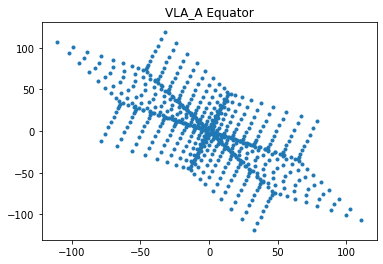

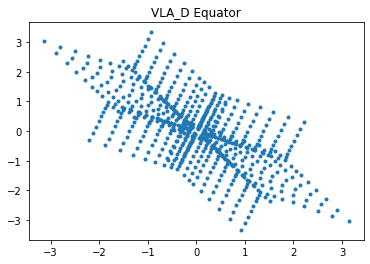

In [45]:
plt.figure(0)

plt.plot(uv_a_eq[0], uv_a_eq[1], '.')
plt.title('VLA_A Equator')

plt.figure(1)

plt.plot(uv_d_eq[0], uv_d_eq[1], '.')
plt.title('VLA_D Equator')

North celestial pole source:

In [46]:
ncp = np.array([np.sin(0), 0, np.cos(0)])

uv_a_ncp = uv_lamb_time(vla_a, ncp, freq = 1.4e9, norm = 1000)
uv_d_ncp = uv_lamb_time(vla_d, ncp, freq = 1.4e9, norm = 1000)

Text(0.5, 1.0, 'VLA_D North Celestial Pole')

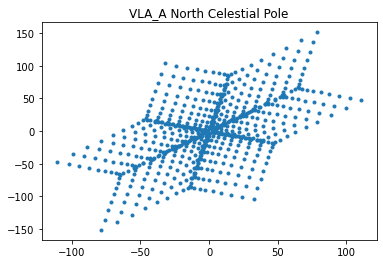

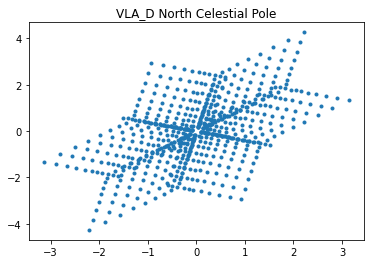

In [47]:
plt.figure(0)

plt.plot(uv_a_ncp[0], uv_a_ncp[1], '.')
plt.title('VLA_A North Celestial Pole')

plt.figure(1)

plt.plot(uv_d_ncp[0], uv_d_ncp[1], '.')
plt.title('VLA_D North Celestial Pole')

e)

We now want to plot the synthesized beams for our results from d)

In [60]:
def beam_time(data, du, source_loc, freq = 1.4e9, norm = 10, suptitle=None):
    
    pos = data[:, :3]*1e-9*3e8
    xyz = ant_pos(data)

    nant = xyz[:, 0].shape[0]
    nvis = nant * (nant - 1) // 2
    uv = np.zeros([nvis, 3])
    icur = 0
    
    for i in range(nant):
        for j in range(i + 1, nant):
            uv[icur,:] = pos[i,:] - pos[j,:]
            icur = icur + 1
            
    uv = np.vstack([uv, - uv]) / 3e8 * freq / norm 

    t_range = np.linspace(-4, 4, 64)
    theta_range = t_range*2*np.pi/24
        
    pad = 4
    sz = int(np.max(np.abs(uv))/du)
    uv_mat = np.zeros([pad*2*sz,2*pad*sz])
        
    for theta in theta_range:
        rot_mat = np.zeros([3, 3])
        rot_mat[0, 0] = np.cos(theta)
        rot_mat[1, 1] = np.cos(theta)
        rot_mat[2, 2] = 1.0
        rot_mat[0, 1] = np.sin(theta)
        rot_mat[1, 0] = -np.sin(theta)
        uv_rot = uv@rot_mat

        EW = np.array([0, 1, 0])
        NS = np.cross(source_loc, EW)
        proj_mat = np.vstack([EW, NS])
        uv_snap = uv_rot@proj_mat.T
        uv_int = np.asarray(uv_snap/du, dtype = 'int')
            
        for i in range(uv_snap.shape[0]):
            uv_mat[uv_int[i, 0], uv_int[i, 1]] = uv_mat[uv_int[i, 0], uv_int[i, 1]] + 1


    beam = np.abs(np.fft.ifft2(uv_mat))
    x0 = beam.shape[0]//2
    dx = 99

    return beam, x0, dx

Overhead source:

In [61]:
synth_a_head = beam_time(vla_a, 40, overhead, freq = 1.4e9, norm = 10)
synth_d_head = beam_time(vla_d, 2, overhead, freq = 1.4e9, norm = 10)

In [69]:
beam_a, x0_a, dx_a = synth_a_head
beam_d, x0_d, dx_d = synth_d_head

fft_beam_a = np.fft.fftshift(beam_a)
fft_beam_d = np.fft.fftshift(beam_d)

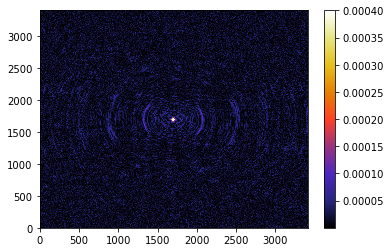

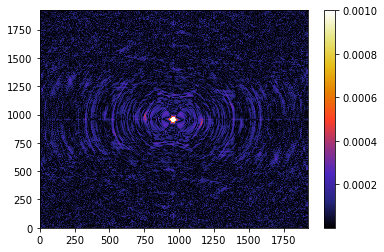

In [75]:
plt.figure(0)

plt.pcolormesh(fft_beam_a, cmap = 'CMRmap', vmax = 0.0004)
plt.title('VLA_A, Overhead')
plt.colorbar()

plt.figure(1)

plt.pcolormesh(fft_beam_d, cmap = 'CMRmap', vmax = 0.001)
plt.title('VLA_D, Overhead')
plt.colorbar()

Equator source:

In [76]:
synth_a_eq = beam_time(vla_a, 40, equator, freq = 1.4e9, norm = 10)
synth_d_eq = beam_time(vla_d, 2, equator, freq = 1.4e9, norm = 10)

In [77]:
beam_a, x0_a, dx_a = synth_a_eq
beam_d, x0_d, dx_d = synth_d_eq

fft_beam_a = np.fft.fftshift(beam_a)
fft_beam_d = np.fft.fftshift(beam_d)

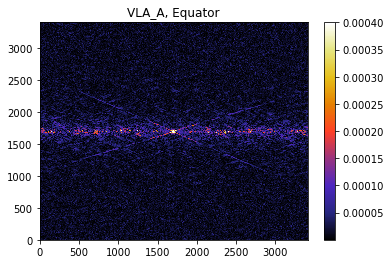

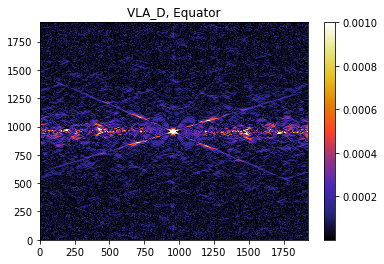

In [78]:
plt.figure(0)

plt.pcolormesh(fft_beam_a, cmap = 'CMRmap', vmax = 0.0004)
plt.title('VLA_A, Equator')
plt.colorbar()

plt.figure(1)

plt.pcolormesh(fft_beam_d, cmap = 'CMRmap', vmax = 0.001)
plt.title('VLA_D, Equator')
plt.colorbar()

North Celestial Pole source:

In [79]:
synth_a_ncp = beam_time(vla_a, 40, ncp, freq = 1.4e9, norm = 10)
synth_d_ncp = beam_time(vla_d, 2, ncp, freq = 1.4e9, norm = 10)

In [80]:
beam_a, x0_a, dx_a = synth_a_ncp
beam_d, x0_d, dx_d = synth_d_ncp

fft_beam_a = np.fft.fftshift(beam_a)
fft_beam_d = np.fft.fftshift(beam_d)

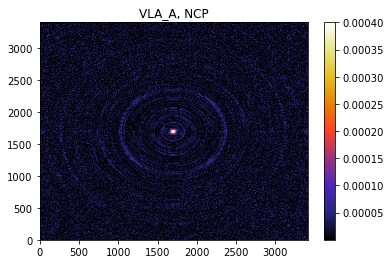

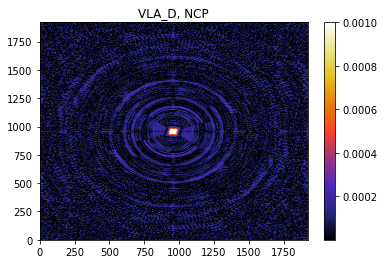

In [81]:
plt.figure(0)

plt.pcolormesh(fft_beam_a, cmap = 'CMRmap', vmax = 0.0004)
plt.title('VLA_A, NCP')
plt.colorbar()

plt.figure(1)

plt.pcolormesh(fft_beam_d, cmap = 'CMRmap', vmax = 0.001)
plt.title('VLA_D, NCP')
plt.colorbar()

## Problem 2

a)

Estimate the FOV of the VLA at 1.4GHz and at 8 GHz

Use the beam width standard formula: $\theta = 1.22\frac{\lambda}{D}$

Take D = 25 m and replace $\lambda$ by $\frac{c}{1.4 GHz}$ and $\frac{c}{8 GHz}$. We find :

In [87]:
print('VLA FOV @ 1.4GHz = ', 1.22*(3*(10**8))/((1.4*(10**9))*(25)) * 180/np.pi, 'deg')
print('VLA FOV @ 8GHz = ', 1.22*(3*(10**8))/((8*(10**9))*(25)) * 180/np.pi, 'deg')

VLA FOV @ 1.4GHz =  0.5991501514796609 deg
VLA FOV @ 8GHz =  0.10485127650894066 deg


b)

We want to calculate the difference in distance for each baseline for the overhead source and a source 30 arcmins to the south. Assume path length difference is given by the dot product of the source angle and the 2D UV coordinates of the antenna.

In [89]:
def diff_2d(data, theta0, theta1):
    
    pos = data[:, :3]*1e-9*3e8
    xyz = ant_pos(data)
    
    nant = xyz[:, 0].shape[0]
    nvis = nant * (nant - 1) // 2
    uv = np.zeros([nvis, 3])
    icur = 0
    
    for i in range(nant):
        for j in range(i + 1, nant):
            uv[icur,:] = pos[i,:] - pos[j,:]
            icur = icur + 1
            
    uv_2d = uv[:,:2] 

    source_vec_2d_overhead = np.array([np.sin(theta0), 0])
    d_overhead = np.dot(uv_2d, source_vec_2d_overhead)

    source_vec_2d_south = np.array([np.sin(theta1), 0])
    d_south = np.dot(uv_2d, source_vec_2d_south)

    path_diff = d_overhead - d_south
    rms = np.sqrt(np.mean(path_diff**2))
    
    return rms

In [94]:
theta0 = (90 - 34.1) * np.pi / 180
theta1 = (90 - 34.1 + 30/60) * np.pi / 180 

In [95]:
rms_2d_a = diff_2d(vla_a, theta0, theta1)
rms_2d_d = diff_2d(vla_d, theta0, theta1)

In [108]:
print('2D RMS for VLA_A =', rms_2d_a, 'm')
print('2D RMS for VLA_D =', rms_2d_d, 'm')

2D RMS for VLA_A = 28.901329009409974 m
2D RMS for VLA_D = 0.821408133042811 m


c)

In [90]:
def diff_3d(data, theta0, theta1):
    
    pos = data[:, :3]*1e-9*3e8
    xyz = ant_pos(data)
    
    nant = xyz[:, 0].shape[0]
    nvis = nant * (nant - 1) // 2
    uv = np.zeros([nvis, 3])
    icur = 0
    
    for i in range(nant):
        for j in range(i + 1, nant):
            uv[icur,:] = pos[i,:] - pos[j,:]
            icur = icur + 1
            
    uv_2d = uv[:,:2] 

    source_vec_3d_overhead = np.array([np.sin(theta0), 0, np.cos(theta0)])
    d_overhead = np.dot(xyz,source_vec_3d_overhead)

    source_vec_3d_south = np.array([np.sin(theta1), 0, np.cos(theta1)])
    d_south = np.dot(xyz,source_vec_3d_south)

    path_diff = d_overhead - d_south
    rms = np.sqrt(np.mean(path_diff**2))
    
    return rms

In [101]:
rms_3d_a = diff_3d(vla_a, theta0, theta1)
rms_3d_d = diff_3d(vla_d, theta0, theta1)

In [106]:
print('3D RMS for VLA_A =', rms_3d_a, 'm')
print('3D RMS for VLA_D =', rms_3d_d, 'm')

3D RMS for VLA_A = 38.70008417315197 m
3D RMS for VLA_D = 1.0950779659231713 m


In [107]:
print('Difference between 3D & 2D RMS for VLA_A  =', rms_3d_a - rms_2d_a, 'm')
print('Difference between 3D & 2D RMS for VLA_D  =', rms_3d_d - rms_2d_d, 'm')

Difference between 3D & 2D RMS for VLA_A  = 9.798755163741998 m
Difference between 3D & 2D RMS for VLA_D  = 0.2736698328803603 m


d)

Now we want to report the RMS phase difference for a source 1 FWHM from the pointing center at both 1.4GHz and 8GHz, when the pointing center is a) directly overhead and b) at the Equator. When do we need to worry about the w term?

In [109]:
def path_diff(data, theta0, theta1):
    
    pos = data[:, :3]*1e-9*3e8
    xyz = ant_pos(data)
            
    source_vec_3d = np.array([np.sin(theta0), 0, np.cos(theta0)])
    path_diff0 = np.dot(xyz, source_vec_3d)
    
    source_vec_3d = np.array([np.sin(theta1), 0, np.cos(theta1)])
    path_diff1 = np.dot(xyz,source_vec_3d)
    
    return np.abs(path_diff1 - path_diff0)

### Pointing center = overhead

1. $f$ = 1.4 GHz

In [125]:
freq = 1.4e9
D = 25
lam = 3e8/freq
FWHM = 3e8/(freq*D) * 180/np.pi * 60
print('Wavelength: ', lam, 'm')
print('FWHM:', FWHM, 'arcsec')

Wavelength:  0.21428571428571427 m
FWHM: 29.466400892442337 arcsec


In [126]:
theta0 = (90 - 34.1) * np.pi / 180  
theta1 = (90 - 34.1 + FWHM/60) * np.pi / 180

path_diff_a = path_diff(vla_a, theta0, theta1)
path_diff_d = path_diff(vla_d, theta0, theta1)

phase_diff_a = 2*np.pi* path_diff_a / lam
phase_diff_d = 2*np.pi* path_diff_d / lam

print('RMS of phase difference for VLA_A =', np.sqrt(np.mean(phase_diff_a**2)), 'rad')
print('RMS of phase difference for VLA_D =', np.sqrt(np.mean(phase_diff_d**2)), 'rad')

RMS of phase difference for VLA_A = 1114.6917960133483 rad
RMS of phase difference for VLA_D = 31.54188636528481 rad


2. $f$ = 8 GHz

In [131]:
freq = 8e9
D = 25
lam = 3e8/freq
FWHM = 3e8/(freq*D) * 180/np.pi * 60
print('Wavelength: ', lam, 'm')
print('FWHM:', FWHM, 'arcsec')

Wavelength:  0.0375 m
FWHM: 5.156620156177409 arcsec


In [128]:
theta0 = (90 - 34.1) * np.pi / 180  
theta1 = (90 - 34.1 + FWHM/60) * np.pi / 180

path_diff_a = path_diff(vla_a, theta0, theta1)
path_diff_d = path_diff(vla_d, theta0, theta1)

phase_diff_a = 2*np.pi* path_diff_a / lam
phase_diff_d = 2*np.pi* path_diff_d / lam

print('RMS of phase difference for VLA_A =', np.sqrt(np.mean(phase_diff_a**2)), 'rad')
print('RMS of phase difference for VLA_D =', np.sqrt(np.mean(phase_diff_d**2)), 'rad')

RMS of phase difference for VLA_A = 1120.5762475661375 rad
RMS of phase difference for VLA_D = 31.70749265149746 rad


### Pointing center = Equator

1. $f$ = 1.4 GHz

In [129]:
freq = 1.4e9
D = 25
lam = 3e8/freq
FWHM = 3e8/(freq*D) * 180/np.pi * 60
print('Wavelength: ', lam, 'm')
print('FWHM:', FWHM, 'arcsec')

Wavelength:  0.21428571428571427 m
FWHM: 29.466400892442337 arcsec


In [130]:
theta0 = 90*np.pi / 180  
theta1 = (90 + FWHM/60) * np.pi/180

path_diff_a = path_diff(vla_a, theta0, theta1)
path_diff_d = path_diff(vla_d, theta0, theta1)

phase_diff_a = 2*np.pi* path_diff_a / lam
phase_diff_d = 2*np.pi* path_diff_d / lam

print('RMS of phase difference for VLA_A =', np.sqrt(np.mean(phase_diff_a**2)), 'rad')
print('RMS of phase difference for VLA_D =', np.sqrt(np.mean(phase_diff_d**2)), 'rad')

RMS of phase difference for VLA_A = 11.564946888222893 rad
RMS of phase difference for VLA_D = 0.24416099232612348 rad


2. $f$ = 8 GHz

In [132]:
freq = 8e9
D = 25
lam = 3e8/freq
FWHM = 3e8/(freq*D) * 180/np.pi * 60
print('Wavelength: ', lam, 'm')
print('FWHM:', FWHM, 'arcsec')

Wavelength:  0.0375 m
FWHM: 5.156620156177409 arcsec


In [133]:
theta0 = 90*np.pi / 180  
theta1 = (90 + FWHM/60) * np.pi/180

path_diff_a = path_diff(vla_a, theta0, theta1)
path_diff_d = path_diff(vla_d, theta0, theta1)

phase_diff_a = 2*np.pi* path_diff_a / lam
phase_diff_d = 2*np.pi* path_diff_d / lam

print('RMS of phase difference for VLA_A =', np.sqrt(np.mean(phase_diff_a**2)), 'rad')
print('RMS of phase difference for VLA_D =', np.sqrt(np.mean(phase_diff_d**2)), 'rad')

RMS of phase difference for VLA_A = 5.773950473499296 rad
RMS of phase difference for VLA_D = 0.1907601495716688 rad


## Problem 3

Consider our 1.4 GHz coverage with our VLA. Consider one source directly overhead, and another separated 1 FWHM to the south. By how much do we need to shift the frequency to make the RMS path length difference change by $\lambda$/2$\pi$ ? [as we change observing frequency, the UV coordinates in wavelengths will change]

In [137]:
def freq_shift(data, theta):
    
    pos = data[:, :3]*1e-9*3e8
    xyz = ant_pos(data)
            
    source_vec_3d = np.array([np.sin(theta), 0, np.cos(theta)])
    path_diff = np.dot(xyz, source_vec_3d)

    freq_shift = 1 / ((2*np.pi*path_diff/3e8))
    
    return freq_shift

Overhead source:

In [156]:
theta = (90 - 34.1) * np.pi / 180

In [157]:
freq_a = freq_shift(vla_a, theta)
freq_shift_a = np.sqrt(np.mean(freq_a**2))

freq_d = freq_shift(vla_d, theta)
freq_shift_d = np.sqrt(np.mean(freq_d**2))

In [158]:
print('(Overhead) Frequency shift needed for VLA_A =', round(freq_shift_a), 'GHz')
print('(Overhead) Frequency shift needed for VLA_D =', round(freq_shift_d), 'GHz')

(Overhead) Frequency shift needed for VLA_A = 313218 GHz
(Overhead) Frequency shift needed for VLA_D = 19455857 GHz


1 FWHM south source:

From 2c), we know that the FWHM at 1.4 GHz frequency is 29.4664 arcsecs:

In [159]:
theta = (90 - 34.1 + 29.4664/60) * np.pi / 180

In [160]:
freq_a = freq_shift(vla_a, theta)
freq_shift_a = np.sqrt(np.mean(freq_a**2))

freq_d = freq_shift(vla_d, theta)
freq_shift_d = np.sqrt(np.mean(freq_d**2))

In [161]:
print('(1 FWHM south) Frequency shift needed for VLA_A =', round(freq_shift_a), 'GHz')
print('(1 FWHM south) Frequency shift needed for VLA_D =', round(freq_shift_d), 'GHz')

(1 FWHM south) Frequency shift needed for VLA_A = 311411 GHz
(1 FWHM south) Frequency shift needed for VLA_D = 19677921 GHz


## Problem 4

a) & b)

[Look at attached PDF for detailed explanations]

I found confusion limits for VLA_A, VLA_D, GBT, FAST (in mJy):

In [181]:
lim_VLA_A = 0.00701369152
lim_VLA_D = 0.6537951083
lim_GBT = 14.08558862
lim_FAST = 3.255467224

c)

See PDF. I obtain the formula, at 1.4 GHz for $T_{sys}$ = 25 C, $\Delta \nu$ = 500 MHz, and 70% apperture efficiency:

In [183]:
def integ_time(sig_c):
    return 90.70757398/(sig_c**2)

In [184]:
print('Integration time for VLA_A =', integ_time(lim_VLA_A), 's')
print('Integration time for VLA_D =', integ_time(lim_VLA_D), 's')
print('Integration time for GBT =', integ_time(lim_GBT), 's')
print('Integration time for FAST =', integ_time(lim_FAST), 's')

Integration time for VLA_A = 1843954.6272094802 s
Integration time for VLA_D = 212.20725028520516 s
Integration time for GBT = 0.4571866611626883 s
Integration time for FAST = 8.558879208204706 s


d)

Our flux values translate, at 8 GHz, with the factor:

In [185]:
fac = (8/1.4)**(-0.8)

lim_VLA_A_8 = fac*lim_VLA_A
lim_VLA_D_8 = fac*lim_VLA_D
lim_GBT_8 = fac*lim_GBT
lim_FAST_8 = fac*lim_FAST

In [186]:
print('VLA_A confusion limit @ 8 GHz = ', lim_VLA_A_8, 'mJy')
print('VLA_D confusion limit @ 8 GHz = ', lim_VLA_D_8, 'mJy')
print('GBT confusion limit @ 8 GHz = ', lim_GBT_8, 'mJy')
print('FAST confusion limit @ 8 GHz = ', lim_FAST_8, 'mJy')

VLA_A confusion limit @ 8 GHz =  0.0017393104230677846 mJy
VLA_D confusion limit @ 8 GHz =  0.16213325652750138 mJy
GBT confusion limit @ 8 GHz =  3.493055123960024 mJy
FAST confusion limit @ 8 GHz =  0.8073163837491881 mJy


See PDF. I obtain the formula, at 8 GHz for $T_{sys}$ = 25 C, $\Delta \nu$ = 2 GHz, and 70% apperture efficiency:

In [187]:
def integ_time_8(sig_c):
    return 22.67689349/(sig_c**2)

In [188]:
print('Integration time for VLA_A =', integ_time_8(lim_VLA_A_8), 's')
print('Integration time for VLA_D =', integ_time_8(lim_VLA_D_8), 's')
print('Integration time for GBT =', integ_time_8(lim_GBT_8), 's')
print('Integration time for FAST =', integ_time_8(lim_FAST_8), 's')

Integration time for VLA_A = 7495996.259603398 s
Integration time for VLA_D = 862.6593794262106 s
Integration time for GBT = 1.8585432913836821 s
Integration time for FAST = 34.79333253887665 s
